In [594]:
import string
import unicodedata

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 7

import re
import threading
import unicodedata
from string import punctuation

import gensim
import joblib
import nltk
import spacy
from autocorrect import Speller, spell
from bs4 import BeautifulSoup
from contractions import contractions_dict
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn import preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from wordcloud import STOPWORDS, WordCloud


In [595]:
# Preprocessing methods

snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

contractions_dict = {     
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I had",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "iit will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

def lemmatize( text):
    """
    take string input and lemmatize the words.
    use WordNetLemmatizer to lemmatize the words.
    """
    word_tokens = nltk.word_tokenize(text)
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in word_tokens]
    return (" ".join(lemmatized_word))

def remove_numbers(text):
    """
    take string input and return a clean text without numbers. 
    Use regex to discard the numbers.
    """
    output = ''.join(c for c in text if not c.isdigit())
    return output

def remove_punct(text):
    """
    take string input and clean string without punctuations.
    use regex to remove the punctuations.
    """
    return ''.join(c for c in text if c not in punctuation)

def remove_stopwords(sentence):
    """
    removes all the stop words like "is,the,a, etc."
    5 lines of code can be written in one line as:
        return ' '.join([w for w in word_tokenize(sentence) if not w in stop_words]) 
    """
    clean_sent =[]
    for w in word_tokenize(sentence):
        if not w in stop_words:
            clean_sent.append(w)
    return " ".join(clean_sent)

def remove_Tags(text):
    """
    take string input and clean string without tags.
    use regex to remove the html tags.
    """
    cleaned_text = re.sub('<[^<]+?>','', text)
    return cleaned_text

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

def sentence_tokenize(text):
    """
    take string input and return list of sentences.
    use nltk.sent_tokenize() to split the sentences.
    """
    sent_list=[]
    for w in nltk.sent_tokenize(text):
        sent_list.append(w)
    return sent_list

def autospell(text):
    """
    correct the spelling of the word.
    """
    spells = [Speller().autocorrect_word(w) for w in (nltk.word_tokenize(text))]
    return " ".join(spells)

def stemming(text):
    """
    take string input and stem the words.
    use snowball_stemmer to stem the string.
    """
    word_tokens = nltk.word_tokenize(text)
    stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
    return " ".join(stemmed_word)

def to_lower(text):
    """
    Converting text to lower case as in, converting "Hello" to "hello" or "HELLO" to "hello".
    """
    return ' '.join([w.lower() for w in word_tokenize(text)])

def word_tokenize( text):
    """
    take string input and return list of words.
    use nltk.word_tokenize() to split the words.
    """
    word_list=[]
    for sentences in nltk.sent_tokenize(text):
        for words in nltk.word_tokenize(sentences):
            word_list.append(words)
    return word_list

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
    #remove_accented_chars('Sómě Áccěntěd těxt')

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                    flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def pre_process1( text):
    """
    """
    text = remove_accented_chars(text)
    text = expand_contractions(text, contractions_dict)
    text = remove_punct(text)
    text = autospell(text)
    text = to_lower(text)
    text = remove_stopwords(text)
    text = remove_numbers(text)
    #text = lemmatize(text)
    text = stemming(text)
    text = word_tokenize(text)
    return ' '.join(text)


def pre_process2(text):
        lower_text = to_lower(text)
        sentence_tokens = sentence_tokenize(lower_text)
        word_list = []
        for each_sent in sentence_tokens:
            lemmatizzed_sent = lemmatize(each_sent)
            clean_text = remove_numbers(lemmatizzed_sent)
            clean_text = remove_punct(clean_text)
            clean_text = remove_Tags(clean_text)
            clean_text = remove_stopwords(clean_text)
            word_tokens = word_tokenize(clean_text)
            for i in word_tokens:
                word_list.append(i)
        return word_list

In [596]:
# multi threading method which does actual preprocessing
def preprocess_features(lst_txt, features):
    for text in lst_txt:
        features.append(pre_process1(text))
        #print(text)

In [597]:
amazon = pd.read_csv('amazonreviews.tsv', sep="\t")
amazon

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
9995,pos,A revelation of life in small town America in ...
9996,pos,Great biography of a very interesting journali...
9997,neg,Interesting Subject; Poor Presentation: You'd ...
9998,neg,Don't buy: The box looked used and it is obvio...


In [598]:
# non-na all values
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10000 non-null  object
 1   review  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [599]:
# label is unbalanced...values are almost close we take accuracy
amazon.label.value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [600]:
amazon['word_count'] = amazon.review.apply(len)
amazon

,label,review,word_count
0,pos,Stuning even for the non-gamer: This sound tra...,426
1,pos,The best soundtrack ever to anything.: I'm rea...,509
2,pos,Amazing!: This soundtrack is my favorite music...,760
3,pos,Excellent Soundtrack: I truly like this soundt...,743
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",481
...,...,...,...
9995,pos,A revelation of life in small town America in ...,867
9996,pos,Great biography of a very interesting journali...,861
9997,neg,Interesting Subject; Poor Presentation: You'd ...,650
9998,neg,Don't buy: The box looked used and it is obvio...,135


In [601]:
amazon.word_count.describe()

count    10000.000000
mean       438.695400
std        239.241132
min        101.000000
25%        238.000000
50%        391.000000
75%        605.000000
max       1015.000000
Name: word_count, dtype: float64

In [602]:
# # multi threading to reduce time for proprocessing....still taking 10 hrs
# features_preproc_1 = []
# features_preproc_2 = []
# features_preproc_3 = []
# features_preproc_4 = []
# features_preproc_5 = []
# features_preproc_6 = []
# features_preproc_7 = []
# features_preproc_8 = []
# features_preproc_9 = []
# features_preproc_10 = []
# t1 = threading.Thread(target=preprocess_features, args=(features[0:1000], features_preproc_1))
# t2 = threading.Thread(target=preprocess_features, args=(features[1000:2000], features_preproc_2))
# t3 = threading.Thread(target=preprocess_features, args=(features[2000:3000], features_preproc_3))
# t4 = threading.Thread(target=preprocess_features, args=(features[3000:4000], features_preproc_4))
# t5 = threading.Thread(target=preprocess_features, args=(features[4000:5000], features_preproc_5))
# t6 = threading.Thread(target=preprocess_features, args=(features[5000:6000], features_preproc_6))
# t7 = threading.Thread(target=preprocess_features, args=(features[6000:7000], features_preproc_7))
# t8 = threading.Thread(target=preprocess_features, args=(features[7000:8000], features_preproc_8))
# t9 = threading.Thread(target=preprocess_features, args=(features[8000:9000], features_preproc_9))
# t10 = threading.Thread(target=preprocess_features, args=(features[9000:10000], features_preproc_10))

# t1.start()
# t2.start()
# t3.start()
# t4.start()
# t5.start()
# t6.start()
# t7.start()
# t8.start()
# t9.start()
# t10.start()

# t4.join()
# t3.join()
# t2.join()
# t1.join()
# t5.join()
# t6.join()
# t7.join()
# t8.join()
# t9.join()
# t10.join()


# print('done')

In [603]:
# final_features = features_preproc_1 + features_preproc_2 + features_preproc_3 + features_preproc_4 + features_preproc_5 + features_preproc_6 + features_preproc_7 + features_preproc_8 + features_preproc_9 + features_preproc_10
# amazon['preprocessed_text'] = final_features
# amazon

In [604]:
# save this data since it took 10 hrs to preprocess text
#amazon.to_pickle('amazondat_with_preprocessed_text.pkl')

# load data from  dataframe pkl file
amazon = pd.read_pickle('amazondat_with_preprocessed_text.pkl')
amazon

,label,review,word_count,preprocessed_text
0,pos,Stuning even for the non-gamer: This sound tra...,426,tune even nongam sound track beauti paint scen...
1,pos,The best soundtrack ever to anything.: I'm rea...,509,best soundtrack ever anyth read lot review say...
2,pos,Amazing!: This soundtrack is my favorite music...,760,amaz soundtrack favorit music time hand intens...
3,pos,Excellent Soundtrack: I truly like this soundt...,743,excel soundtrack truli like soundtrack enjoy v...
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",481,rememb pull jaw floor hear play game know divi...
...,...,...,...,...
9995,pos,A revelation of life in small town America in ...,867,revel life small town america earli s though s...
9996,pos,Great biography of a very interesting journali...,861,great biographi interest journalist biographi ...
9997,neg,Interesting Subject; Poor Presentation: You'd ...,650,interest subject poor present hardpress tell b...
9998,neg,Don't buy: The box looked used and it is obvio...,135,buy box look use obvious new tri contact email...


In [605]:
final_features = amazon['preprocessed_text']
encoder = LabelEncoder()
label = encoder.fit_transform(amazon['label'])
print('classes: ', encoder.classes_, 
      '\nencoded : ',encoder.transform(encoder.classes_))

classes:  ['neg' 'pos'] 
encoded :  [0 1]


***
### Lets see what people are talking about
***

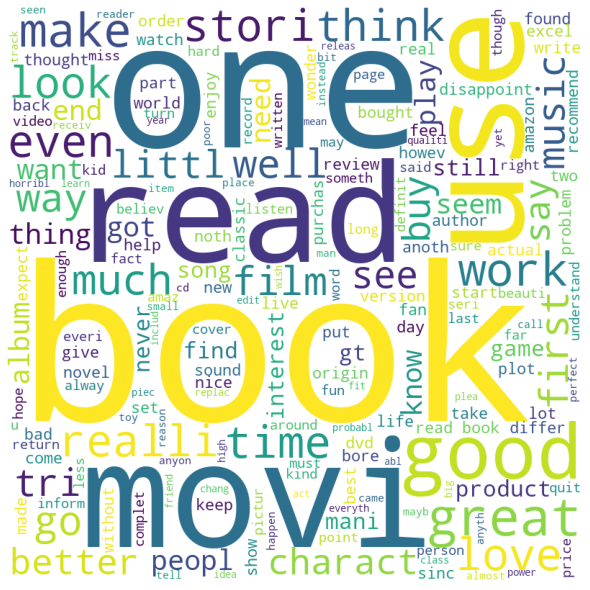

In [606]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(' '.join(final_features))

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

***
### People have reviewed mostly books, movies, music, songs
***

In [607]:
class TextProcessing_Transformer(BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        super().__init__()
    
    def fit(self, X, y=None):
        print('-->text preprocessing input X')
        return pd.Series(X).apply(pre_process1).values
    
    def transform(self, X, y=None):
        print('-->text preprocessing input X')
        return pd.Series(X).apply(pre_process1).values

In [608]:
class BOW_Transformer(BaseEstimator, TransformerMixin):
    '''
    # CountVectorizer.fit generates raw frequencies of occurrence  of a token (BOW...sparse matrix)
    # CountVectorizer.transforms generates Bag of Words (BOW...sparse matrix)
    
    '''
    def __init__(self):
        super().__init__()
        self.countvectorizer_ = CountVectorizer()   # count of vocabulary/vocabulary building/BOW
        self.fitted_countvectorizer_ = None             # fitted object having vocabulary information
        self.transformed_BOW_ = None           # BOW sparse matrix
        
    # def fit_transform(self, X, y=None):
    #     print('-->>BOW_fit_transform')
    #     self.CV_fit = self.CV_.fit(X)
    #     self.BOW_mat_ = self.CV_fit.fit_transform(X) #Build the Vocabulary
    #     return self.BOW_mat_
        
    def fit(self, X, y=None, **fargs):
        print('-->BOW fit')
        self.fitted_countvectorizer_ = self.countvectorizer_.fit(X)
        return self.fitted_countvectorizer_
        
    def transform(self, X, y=None):
        print('-->>Bow transform')
        self.transformed_BOW_ = self.fitted_countvectorizer_.transform(X) # To create BOW
        return self.transformed_BOW_
    
    def convert_sparsematrix_to_df(self, index):
        print('-->sample Dataframe BOW')
        df = pd.DataFrame(self.transformed_BOW_.todense(), index = index, columns=self.countvectorizer_.get_feature_names())
        #df = pd.melt(df.reset_index(), id_vars=['index'], value_name='token_count').query('token_count > 1').sort_values(['token_count'], ascending=False)
        print('-->> ', df.shape)
        return df      


In [609]:
class Tfidf_Transformer(BaseEstimator, TransformerMixin):
    '''
    # Applying TfidfTransformer on BOW's scale down the impact of tokens that occur very frequently (sparse matrix)
    '''
    def __init__(self):
        super().__init__()
        self.idf_transformer_ = TfidfTransformer()  # transformer
        self.fitted_idf_transformer_ = None          # fitted transformer 
        self.transformed_tfidf_ = None          # transformed sparse matrix
    
    # def fit_transform(self, X, y=None):
    #     print('-->>Tfidf_fit_transform')
    #     self.IDf_fitted = self.Idf_transform_.fit(X) # Learn IDF VEctor (self.Idf_transform_.idf_)
    #     self.tfidf_mat_ = self.Idf_transform_.transform(X)
    #     return self.tfidf_mat_
    
    def fit(self, X, y=None):
        print('-->>tfidf fit')
        self.fitted_idf_transformer_ = self.idf_transformer_.fit(X) # Learn IDF VEctor (self.Idf_transform_.idf_)
        return self.fitted_idf_transformer_
        
        
    def transform(self, X, y=None):
        print('-->>tidf transform')
        self.transformed_tfidf_ = self.fitted_idf_transformer_.transform(X) # apply IDF vector on count matrix
        return self.transformed_tfidf_
    
    def convert_sparsematrix_to_df(self, feature_names, index):
        print('-->>sample Dataframe tfidf')
        df = pd.DataFrame(self.transformed_tfidf_.todense(), index = index, columns=feature_names)
        #df = pd.melt(df.reset_index(), id_vars=['index'], value_name='token_count').query('token_count > 1').sort_values(['token_count'], ascending=False)
        print('-->> ', df.shape)
        return df 


In [610]:
    
class DimReduction_Transformer(BaseEstimator, TransformerMixin):
    '''
    ### Dimention reduction can be specified in Init
    '''
    def __init__(self, dimentionreduction_):
        super().__init__()
        self.dimentionreduction_ = dimentionreduction_
        self.fitted_dimentionreduction_ = None
        
    def transform(self, X, y= None):
        print('-->>dimention reductiion transform')
        return self.fitted_dimentionreduction_.transform(X)

    # def fit_transform(self, X, y=None):
    #     print('-->>svd fit_transform')
    #     self.dr_fitted = self.dr.fit(X,y)
    #     return self.dr.fit_transform(X,y)
    
    def fit(self, X, y=None):
        print('-->>dimention reduction fit')
        self.fitted_dimentionreduction_ = self.dimentionreduction_.fit(X,y)
        return self.fitted_dimentionreduction_

In [611]:
class Splitter_Transformer(BaseEstimator, TransformerMixin):
    def __init__(self, caller):
        super().__init__()
        self.X_train, self.X_test, self.y_train, self.y_test = None, None, None, None
        self.caller = caller # keep track for which classifier we are splitting
        
    
    def transform(self, X, y=None, **fit_params):
        print('-->>' + 'spliter transform called for ' +  self.caller +  '...doing nothing returning self')
        # if(self.X_train is None):
        #     print('    -->>splitting X and y')
        #     self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, random_state=10, test_size=0.2, stratify=y)
        # else:
        #     print('     -->>already split is done..doing nothing')
        # #return self.X_train, self.y_train
        return self
    
    def fit(self, X, y=None, **fit_params):
        print('-->>' + 'splitter fit called for ' + self.caller +  '...splitting X and y')
        # if(self.X_train is None):
        #     print('    -->>splitting X and y')
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, random_state=10, test_size=0.2, stratify=y)
        # else:
        #     print('     -->>already split is done..doing nothing')
        #return self.X_train, self.y_train
        return self
    
    # def fit_transform(self, X, y=None, **fit_params):
    #     print('-->>Custo_train_test_splitter fit_transform')
    #     if(self.X_train is None):
    #         self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, random_state=10, test_size=0.2, stratify=y)
    #     # print(self.X_train)
    #     # print(self.y_train)
    #     #return self.X_train, self.y_train
    #     return self

In [612]:
class Classifier_Transformer(BaseEstimator, TransformerMixin):
    def __init__(self, classifier_) -> None:
        print('init Classifier_Transformer')
        super().__init__()
        self.classifier_ = classifier_
        self.fitted_classifier_= None
        self.fitted_classifier_train_ = None # to hold predicted train... Modelling with train test split
        self._estimator_type = 'classifier' # to satisfy VotingClassifier
    
    def fit(self, X,y=None, **fit_params):
        print('-->>' + type(self.classifier_).__name__ + ' fit')
        
        if type(X).__name__ is 'Splitter_Transformer':
            # print(self.splitter.X_train)
            # print(self.splitter.y_train)
            # print(X.X_train)
            # print(y)
            print('    -->>fitting on X_train, y_train from Splitter_Transformer')
            self.fitted_classifier_ = self.classifier_.fit(X.X_train, X.y_train) # this is the Custo_train_test_splitter which has X_train, X_test, y_train, y_test
        else:
            print('    -->>fitting on input X, y')
            self.fitted_classifier_ = self.classifier_.fit(X, y) # this is the case when splitter is not used...deployment case
        return self  # typically fitted object is returned but then classifiers do not have transform method which is invoked next in Pipeline...return self since we have implemeted transform here
        #return self.clf_fit

    def transform(self, X, y=None):
        #print('Custo_Classifier transform...since no transform for classifier..returning same X received')
        #return X
        print('-->>' + type(self.classifier_).__name__ + ' transform...since no transform for classifier..returning self (Custo_Classifier) which has classifier')
        return self
    
    def predict(self, X, **fit_params):
        print('-->>' + type(self.classifier_).__name__ + ' predict')
        if type(X).__name__ is 'Splitter_Transformer':
            print('     -->>predict on X_train from Splitter_Transformer...stored in self.fitted_classifier_train_')
            self.fitted_classifier_train_ = self.fitted_classifier_.predict(X.X_train)
            print('     -->>predict on X_test, y_test from Splitter_Transformer...returning as prediction')
            return self.fitted_classifier_.predict(X.X_test)
        else:
            print('     -->>predict on imput X')
            return self.fitted_classifier_.predict(X)
        
    def get_predicted_train(self):
        return self.fitted_classifier_train_
   


In [613]:
class Sentiment_Transformer(BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        super().__init__()
        self.sentimentAnalyser_ = SentimentIntensityAnalyzer()
        self.applied_sentimentAnalyzer_ = None
        self.applied_sentimentAnalyzer_train_ = None  # to hold predicted train... Modelling with train test split
        self._estimator_type = 'classifier'
    
    def fit(self, X, y=None, **fit_params):
        print('-->Custo_VaderTransformer fit')
        if type(X).__name__ is 'Splitter_Transformer':
            print('     -->>>applying sentiment analyzer on X_train from Splitter_Transformer')
            self.applied_sentimentAnalyzer_ = pd.Series(X.X_train).apply(lambda review: 1 if self.sentimentAnalyser_.polarity_scores(review)['compound'] > 0.5 else 0) #'pos' =1, 'neg' = 0
        else:
            print('     -->>>applying sentiment analyzer on imput X')
            self.applied_sentimentAnalyzer_ = pd.Series(X).apply(lambda review: 1 if self.sentimentAnalyser_.polarity_scores(review)['compound'] > 0.5 else 0) #'pos' =1, 'neg' = 0
        return self
    
    # def fit_transform(self, X, y=None, **fit_params):
    #     if type(X) is Custo_train_test_splitter:
    #         self.vaded = pd.Series(X.X_train).apply(lambda review: 1 if self.sentimentAnalyser_.polarity_scores(review)['compound'] > 0.5 else 0) #'pos' =1, 'neg' = 0
    #     else:
    #         self.vaded = pd.Series(X).apply(lambda review: 1 if self.sentimentAnalyser_.polarity_scores(review)['compound'] > 0.5 else 0) #'pos' =1, 'neg' = 0
    #     return self
    
    def transform(self, X, y=None, **fit_params):
        print('-->Custo_VaderTransformer transform')
        if type(X).__name__ is 'Splitter_Transformer':
            print('     -->>>applying sentiment analyzer on X_test from Splitter_Transformer')
            self.applied_sentimentAnalyzer_ = pd.Series(X.X_train).apply(lambda review: 1 if self.sentimentAnalyser_.polarity_scores(review)['compound'] > 0.5 else 0) #'pos' =1, 'neg' = 0
        else:
            print('     -->>>applying sentiment analyzer on imput X')
            self.applied_sentimentAnalyzer_ = pd.Series(X).apply(lambda review: 1 if self.sentimentAnalyser_.polarity_scores(review)['compound'] > 0.5 else 0) #'pos' =1, 'neg' = 0
        return self
    
    def predict(self, X, **fit_params):
        print('-->Custo_VaderTransformer predict')
        if type(X).__name__ is 'Splitter_Transformer':
            print('     -->>applying sentiment analyzer on X_train from Splitter_Transformer...stored in self.applied_sentimentAnalyzer_train_')
            self.applied_sentimentAnalyzer_train_ = pd.Series(X.X_train).apply(lambda review: 1 if self.sentimentAnalyser_.polarity_scores(review)['compound'] > 0.5 else 0) #'pos' =1, 'neg' = 0
            print('     -->>applying sentiment analyzer on X_test from Splitter_Transformer...returning as prediction')
            self.applied_sentimentAnalyzer_ = pd.Series(X.X_test).apply(lambda review: 1 if self.sentimentAnalyser_.polarity_scores(review)['compound'] > 0.5 else 0) #'pos' =1, 'neg' = 0
        else:
            print('     -->>>applying sentiment analyzer on imput X')
            self.applied_sentimentAnalyzer_ = pd.Series(X).apply(lambda review: 1 if self.sentimentAnalyser_.polarity_scores(review)['compound'] > 0.5 else 0) #'pos' =1, 'neg' = 0
        
        return self.applied_sentimentAnalyzer_
    
    def get_predicted_train(self):
        return self.applied_sentimentAnalyzer_train_

In [625]:
# classifier and dimention reduction
classifier = DecisionTreeClassifier(random_state=10)
svd = TruncatedSVD(50)

# steps for pipe
splitter = Splitter_Transformer('tfidf')
tfidf = Tfidf_Transformer()
bow = BOW_Transformer()
custo_classifier = Classifier_Transformer(classifier)
custo_dimreduction = DimReduction_Transformer(svd)

# create a pipe for sequential execution of steps
pipe_tfidf = Pipeline([('bow', bow),
                ('tfidf', tfidf),
                ('dimreductioin', custo_dimreduction),
                ('train_test_splitter_tfidf', splitter),
                ('classifier', custo_classifier)
                ])


init Classifier_Transformer


In [626]:
# steps for pipe
splitter_senti = Splitter_Transformer('sentimentanalyzer')
sentimentanalyzer = Sentiment_Transformer()

# pipe for sequential execution
pipe_sentiment = Pipeline([('train_test_splitter_sentimentanalyzer', splitter_senti),
                       ('classifier', sentimentanalyzer)])

In [627]:
# create a voting pipe...we take hard majority vote (0 or 1 from different piped classifiers)
voting_classifier = VotingClassifier(estimators=[('pipe_tfidf', pipe_tfidf), 
                                                 ('pipe_sentiiment', pipe_sentiment)],
                                                voting='hard')
pipe_voting = Pipeline([('voting', voting_classifier)])
                       

In [628]:
pipe_voting.fit(final_features, label)

init Classifier_Transformer
-->BOW fit
-->>tfidf fit
-->>dimention reduction fit
-->>splitter fit called for tfidf...splitting X and y
-->>spliter transform called for tfidf...doing nothing returning self
-->>DecisionTreeClassifier fit
    -->>fitting on X_train, y_train from Splitter_Transformer
-->>splitter fit called for sentimentanalyzer...splitting X and y
-->>spliter transform called for sentimentanalyzer...doing nothing returning self
-->Custo_VaderTransformer fit
     -->>>applying sentiment analyzer on X_train from Splitter_Transformer


Pipeline(steps=[('voting',
                 VotingClassifier(estimators=[('pipe_tfidf',
                                               Pipeline(steps=[('bow',
                                                                BOW_Transformer()),
                                                               ('tfidf',
                                                                Tfidf_Transformer()),
                                                               ('dimreductioin',
                                                                DimReduction_Transformer(dimentionreduction_=TruncatedSVD(n_components=50))),
                                                               ('train_test_splitter_tfidf',
                                                                Splitter_Transformer(caller='tfidf')),
                                                               ('classifier',
                                                                Classifier_Transformer(classifier_=De

***
### Retrieve fitted objects from pipelines
***

In [629]:
# tfidf pipeline fitted objects .....fitted by VotingClassifier
fitted_BOW = pipe_voting.steps[0][1].estimators_[0].steps[0][1]
fitted_tfidf = pipe_voting.steps[0][1].estimators_[0].steps[1][1]
fitted_dimention_tfidf = pipe_voting.steps[0][1].estimators_[0].steps[2][1]
fitted_splitter_tfidf = pipe_voting.steps[0][1].estimators_[0].steps[3][1]
fitted_classifier_tfidf = pipe_voting.steps[0][1].estimators_[0].steps[4][1]

# sentimentanalyzer pipeline fitted objects .....fitted by VotingClassifier
fitted_splitter_senti = pipe_voting.steps[0][1].estimators_[1].steps[0][1]
fitted_classifier_senti = pipe_voting.steps[0][1].estimators_[1].steps[1][1]

# fitted VotingClassifier
fitted_votingclassifier = pipe_voting.steps[0][1]

***
### Pipeline is created with intention for deployment
### fit on pipeline has clready created train and test data
>### we just have to re-use the already splitted test data for predict
### Predict however will call tansform on all steps (BOW, TFIDF, dimentionreduction)
>### bypass those steps on pipeline so only splitted test data is passed to classifier
***

In [630]:
# current fited params
print('current fitted params ->\n',  pipe_voting.steps[0][1].estimators_[0].get_params(deep=False))
# bypass first 3 steps...keep last 2 steps fitted objects
params = {'steps': [('bow', 'passthrough'),
  ('tfidf', 'passthrough'),
  ('dimreductioin','passthrough'),
  ('train_test_splitter_tfidf', fitted_splitter_tfidf), # keep exiting fitted spliter
  ('classifier', fitted_classifier_tfidf)]} # keep exiting fitted classifier

print('\n\nupdated params to bypass steps -> \n', params)
# set params on tfidf pipeline under VotingClassifier
pipe_voting.steps[0][1].estimators_[0].set_params(**params)


current fitted params ->
 {'memory': None, 'steps': [('bow', BOW_Transformer()), ('tfidf', Tfidf_Transformer()), ('dimreductioin', DimReduction_Transformer(dimentionreduction_=TruncatedSVD(n_components=50))), ('train_test_splitter_tfidf', Splitter_Transformer(caller='tfidf')), ('classifier', Classifier_Transformer(classifier_=DecisionTreeClassifier(random_state=10)))], 'verbose': False}


updated params to bypass steps -> 
 {'steps': [('bow', 'passthrough'), ('tfidf', 'passthrough'), ('dimreductioin', 'passthrough'), ('train_test_splitter_tfidf', Splitter_Transformer(caller='tfidf')), ('classifier', Classifier_Transformer(classifier_=DecisionTreeClassifier(random_state=10)))]}


Pipeline(steps=[('bow', 'passthrough'), ('tfidf', 'passthrough'),
                ('dimreductioin', 'passthrough'),
                ('train_test_splitter_tfidf',
                 Splitter_Transformer(caller='tfidf')),
                ('classifier',
                 Classifier_Transformer(classifier_=DecisionTreeClassifier(random_state=10)))])

In [631]:
# pass dummy features since pipe will utilise already splitted X_test, y_test data from fit
dumy_features = []
y_pred = pipe_voting.predict(dumy_features)

-->>spliter transform called for tfidf...doing nothing returning self
-->>DecisionTreeClassifier predict
     -->>predict on X_train from Splitter_Transformer...stored in self.fitted_classifier_train_
     -->>predict on X_test, y_test from Splitter_Transformer...returning as prediction
-->>spliter transform called for sentimentanalyzer...doing nothing returning self
-->Custo_VaderTransformer predict
     -->>applying sentiment analyzer on X_train from Splitter_Transformer...stored in self.applied_sentimentAnalyzer_train_
     -->>applying sentiment analyzer on X_test from Splitter_Transformer...returning as prediction


In [632]:
# we have 2 splitters for tfidf and sentimentanalyzer but both do the same split....so pick any one to get train and test
print('train f1-score: ', f1_score(fitted_splitter_tfidf.y_train, fitted_classifier_tfidf.get_predicted_train()))
print('test f1-score: ', f1_score(fitted_splitter_tfidf.y_test, y_pred))

train f1-score:  1.0
test f1-score:  0.6472684085510688


***
### Votingclassifier seems to overfit due to DecisionTreeClassifier...pruning that to reduce overfit
***

Text(0, 0.5, 'total impurity of leaves')

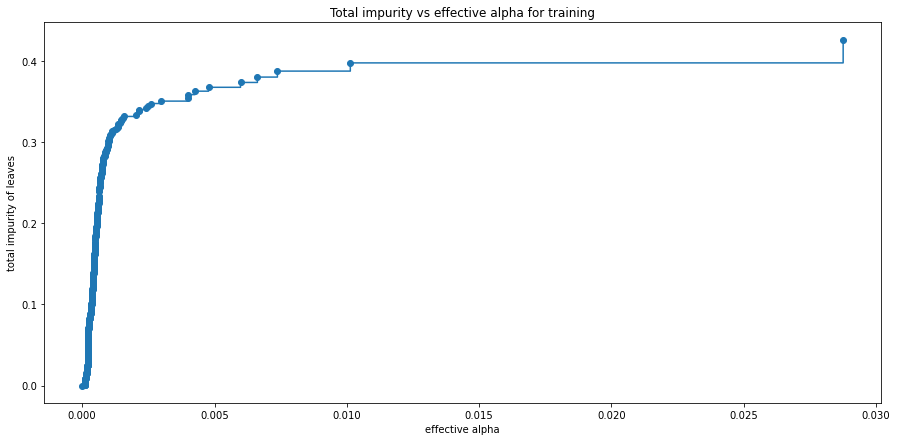

In [278]:
path = fitted_classifier_tfidf.classifier_.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post') # removed last one since it is a single node without leaves
ax.set_title('Total impurity vs effective alpha for training')
ax.set_xlabel('effective alpha')
ax.set_ylabel('total impurity of leaves')

***
### Next get accuracy vs alpha for train/test (...trim leaves from decision tree so as to balance overfit while still keeping good test score)
***

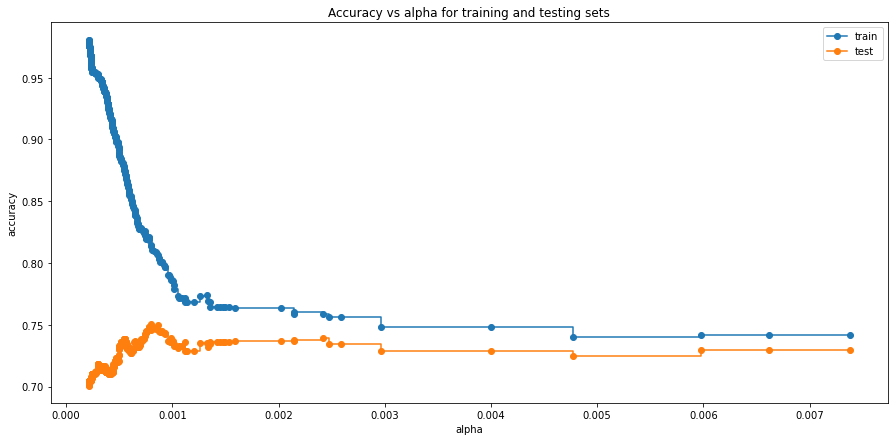

In [279]:
# build train classifiers 
clfs=[]
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=10, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# get scores on both train test
train_scores= [f1_score(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [f1_score(y_test, clf.predict(X_test)) for clf in clfs]
df_scores = pd.DataFrame({'train_score': train_scores, 'test_score': test_scores, 'ccp_alpha': ccp_alphas})
df_scores = df_scores[(df_scores.train_score > 0.70) & (df_scores.test_score > 0.70)].reset_index(drop=True)
df_scores['diff'] = df_scores.train_score - df_scores.test_score
df_scores = df_scores[(df_scores.test_score > 0.7) & df_scores.train_score > 0.7]#.sort_values(by='diff', ascending=True)

indexstart = 0
indexend = df_scores.shape[0]

# plot the results
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(df_scores.ccp_alpha[indexstart:indexend], df_scores.train_score[indexstart:indexend], marker="o", label="train", drawstyle="steps-post")
ax.plot(df_scores.ccp_alpha[indexstart:indexend], df_scores.test_score[indexstart:indexend], marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

***
### Parameter tuning for DecisionTreeClassifier withinn pipe
>### In that set updated parameters and call fit on transformer
***

In [633]:
# parameter tuning
parameters = fitted_classifier_tfidf.classifier_.get_params()
parameters['ccp_alpha'] = 0.006
parameters['max_depth'] = 20
parameters['max_features'] = 'auto'
parameters = fitted_classifier_tfidf.classifier_.set_params(**parameters)

# update the fitted classifier in transformer class
fitted_classifier_tfidf.fit(X_train, y_train)

# pass dummy features since pipe will utilise already splitted X_test, y_test data from fit
dumy_features = []
y_pred = pipe_voting.predict(dumy_features)

# print results
print('train f1-score: ', f1_score(fitted_splitter_tfidf.y_train, fitted_classifier_tfidf.get_predicted_train()))
print('test f1-score: ', f1_score(fitted_splitter_tfidf.y_test, y_pred))

-->>DecisionTreeClassifier fit
    -->>fitting on input X, y
-->>spliter transform called for tfidf...doing nothing returning self
-->>DecisionTreeClassifier predict
     -->>predict on X_train from Splitter_Transformer...stored in self.fitted_classifier_train_
     -->>predict on X_test, y_test from Splitter_Transformer...returning as prediction
-->>spliter transform called for sentimentanalyzer...doing nothing returning self
-->Custo_VaderTransformer predict
     -->>applying sentiment analyzer on X_train from Splitter_Transformer...stored in self.applied_sentimentAnalyzer_train_
     -->>applying sentiment analyzer on X_test from Splitter_Transformer...returning as prediction
train f1-score:  0.7407492795389049
test f1-score:  0.7029649595687332


***
### SL = 0.7
### CL = 0.3
### We have a increase on test accuracy from 65 % to 70%
### However the model is slightly overfitted train(74.05%) > test(70.32%) > CL(70%)
### Subject to further hyperparameter/adding/canging classifier tuning using Grid Search
### Prepare to deploy
***

***
### Restore the tfidf pipeline by setting again fitted objects inside pipeline
***

In [634]:
params = {'steps': [('bow', fitted_BOW),
  ('tfidf', fitted_tfidf),
  ('dimreductioin',fitted_dimention_tfidf),
  ('train_test_splitter_tfidf', fitted_splitter_tfidf), # keep exiting fitted spliter
  ('classifier', fitted_classifier_tfidf)]} # keep exiting fitted classifier

# set params on tfidf pipeline under VotingClassifier
pipe_voting.steps[0][1].estimators_[0].set_params(**params)

Pipeline(steps=[('bow', BOW_Transformer()), ('tfidf', Tfidf_Transformer()),
                ('dimreductioin',
                 DimReduction_Transformer(dimentionreduction_=TruncatedSVD(n_components=50))),
                ('train_test_splitter_tfidf',
                 Splitter_Transformer(caller='tfidf')),
                ('classifier',
                 Classifier_Transformer(classifier_=DecisionTreeClassifier(ccp_alpha=0.006,
                                                                           max_depth=20,
                                                                           max_features='auto',
                                                                           random_state=10)))])

In [635]:
# confirm updated steps in pipeline
pipe_voting.steps[0][1].estimators_

[Pipeline(steps=[('bow', BOW_Transformer()), ('tfidf', Tfidf_Transformer()),
                 ('dimreductioin',
                  DimReduction_Transformer(dimentionreduction_=TruncatedSVD(n_components=50))),
                 ('train_test_splitter_tfidf',
                  Splitter_Transformer(caller='tfidf')),
                 ('classifier',
                  Classifier_Transformer(classifier_=DecisionTreeClassifier(ccp_alpha=0.006,
                                                                            max_depth=20,
                                                                            max_features='auto',
                                                                            random_state=10)))]),
 Pipeline(steps=[('train_test_splitter_sentimentanalyzer',
                  Splitter_Transformer(caller='sentimentanalyzer')),
                 ('classifier', Sentiment_Transformer())])]

***
### Before Deployment 
* >### add text preprocessing as first step (preprocessing was done seperately during modelling ...took a very long time)
* >### remove the splitter used for modelling
***

In [636]:
# adding text proprocessing step here to pipe as first step...preprocessing took a very long time and hence for model building it was done seperately
pipe_voting.steps.insert(0, ('text_preprocessing', TextProcessing_Transformer()))

# remove splitter for both tfidf pipe and sentimentanalyzer 
pipe_voting.steps[1][1].estimators_[0].steps.pop(3)
pipe_voting.steps[1][1].estimators_[1].steps.pop(0)

print(pipe_voting.steps[1][1].estimators_[0].steps) # confirm steps
print(pipe_voting.steps[1][1].estimators_[1].steps) # confirm steps


[('bow', BOW_Transformer()), ('tfidf', Tfidf_Transformer()), ('dimreductioin', DimReduction_Transformer(dimentionreduction_=TruncatedSVD(n_components=50))), ('classifier', Classifier_Transformer(classifier_=DecisionTreeClassifier(ccp_alpha=0.006,
                                                          max_depth=20,
                                                          max_features='auto',
                                                          random_state=10)))]
[('classifier', Sentiment_Transformer())]


***
### Deployed and Serialize to disk
***

In [643]:
# take sample data 10 entries from amazon as deployment data
deploy_Data = amazon['review'][::999]

# call transform on all objects of pipeline....
# transform on last step Custo_TrainTestSpliter_Classifier does nothing...returns the transformed data from previous step
prediction = pipe_voting.predict(deploy_Data)
pd.DataFrame({'review': deploy_Data, 'prediction': encoder.inverse_transform(prediction)})

-->text preprocessing input X
-->>Bow transform
-->>tidf transform
-->>dimention reductiion transform
-->>DecisionTreeClassifier predict
     -->>predict on imput X
-->Custo_VaderTransformer predict
     -->>>applying sentiment analyzer on imput X


,review,prediction
0,Stuning even for the non-gamer: This sound tra...,pos
999,"Science: ""On average, we breathe through one n...",neg
1998,Umbra tension rod: I am pleased with my Umbra ...,neg
2997,"If you have already watched trasformer 1, don'...",neg
3996,Seams Came Apart After 5th Use: I bought this ...,neg
4995,A MUST READ FOR ANYONE INTERESTED IN TRUE CRIM...,pos
5994,"Not the real deal: We received our comforter, ...",pos
6993,A Must Read for Literary Fiction Fans: Amazing...,pos
7992,Tea Chest Review - More for the tea than the c...,pos
8991,New to collecting? This will help.: Vastly ill...,pos


***
### Serialize to disk
***

In [638]:
joblib.dump(pipe_voting, 'deployed_amazon_pipe.pkl', compress = 1)

['deployed_amazon_pipe.pkl']

***
### Reload deployed pipe from disk
***

In [639]:
pipe_reloaded = joblib.load('deployed_amazon_pipe.pkl')
pipe_reloaded.steps[1][1].estimators_

[Pipeline(steps=[('bow', BOW_Transformer()), ('tfidf', Tfidf_Transformer()),
                 ('dimreductioin',
                  DimReduction_Transformer(dimentionreduction_=TruncatedSVD(n_components=50))),
                 ('classifier',
                  Classifier_Transformer(classifier_=DecisionTreeClassifier(ccp_alpha=0.006,
                                                                            max_depth=20,
                                                                            max_features='auto',
                                                                            random_state=10)))]),
 Pipeline(steps=[('classifier', Sentiment_Transformer())])]

***
### Predict
***

In [644]:
prediction = pipe_voting.predict(deploy_Data)
pd.DataFrame({'review': deploy_Data, 'prediction': encoder.inverse_transform(prediction)})

-->text preprocessing input X
-->>Bow transform
-->>tidf transform
-->>dimention reductiion transform
-->>DecisionTreeClassifier predict
     -->>predict on imput X
-->Custo_VaderTransformer predict
     -->>>applying sentiment analyzer on imput X


,review,prediction
0,Stuning even for the non-gamer: This sound tra...,pos
999,"Science: ""On average, we breathe through one n...",neg
1998,Umbra tension rod: I am pleased with my Umbra ...,neg
2997,"If you have already watched trasformer 1, don'...",neg
3996,Seams Came Apart After 5th Use: I bought this ...,neg
4995,A MUST READ FOR ANYONE INTERESTED IN TRUE CRIM...,pos
5994,"Not the real deal: We received our comforter, ...",pos
6993,A Must Read for Literary Fiction Fans: Amazing...,pos
7992,Tea Chest Review - More for the tea than the c...,pos
8991,New to collecting? This will help.: Vastly ill...,pos


***
### check expanded views of BOW and TFIDF
***

In [641]:
# tfidf pipeline fitted objects .....fitted by VotingClassifier
fitted_BOW = pipe_reloaded.steps[1][1].estimators_[0].steps[0][1]
fitted_tfidf = pipe_reloaded.steps[1][1].estimators_[0].steps[1][1]


In [659]:
#check fitted BOW
df_BOW = fitted_BOW.convert_sparsematrix_to_df(deploy_Data.index)
df_BOW.insert(500, 'Amazon_review_col', deploy_Data)
df_BOW.iloc[:, 500:510]

-->sample Dataframe BOW
-->>  (11, 20555)


,Amazon_review_col,alreadybewar,alreadycr,alreadydestroyeda,alright,also,alsoful,alsostop,alsoth,alt
0,Stuning even for the non-gamer: This sound tra...,0,0,0,0,0,0,0,0,0
999,"Science: ""On average, we breathe through one n...",0,0,0,0,0,0,0,0,0
1998,Umbra tension rod: I am pleased with my Umbra ...,0,0,0,0,0,0,0,0,0
2997,"If you have already watched trasformer 1, don'...",0,0,0,0,0,0,0,0,0
3996,Seams Came Apart After 5th Use: I bought this ...,0,0,0,0,0,0,0,0,0
4995,A MUST READ FOR ANYONE INTERESTED IN TRUE CRIM...,0,0,0,0,1,0,0,0,0
5994,"Not the real deal: We received our comforter, ...",0,0,0,0,0,0,0,0,0
6993,A Must Read for Literary Fiction Fans: Amazing...,0,0,0,0,0,0,0,0,0
7992,Tea Chest Review - More for the tea than the c...,0,0,0,0,0,0,0,0,0
8991,New to collecting? This will help.: Vastly ill...,0,0,0,0,0,0,0,0,0


In [660]:
#Check fitted IDF
df_TFIDF = fitted_tfidf.convert_sparsematrix_to_df(fitted_BOW.fitted_countvectorizer_.get_feature_names(), deploy_Data.index)
df_TFIDF.insert(500, 'Amazon_review_col', deploy_Data)
df_TFIDF.iloc[:, 500:510]

-->>sample Dataframe tfidf
-->>  (11, 20555)


,Amazon_review_col,alreadybewar,alreadycr,alreadydestroyeda,alright,also,alsoful,alsostop,alsoth,alt
0,Stuning even for the non-gamer: This sound tra...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
999,"Science: ""On average, we breathe through one n...",0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1998,Umbra tension rod: I am pleased with my Umbra ...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2997,"If you have already watched trasformer 1, don'...",0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3996,Seams Came Apart After 5th Use: I bought this ...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4995,A MUST READ FOR ANYONE INTERESTED IN TRUE CRIM...,0.0,0.0,0.0,0.0,0.11495,0.0,0.0,0.0,0.0
5994,"Not the real deal: We received our comforter, ...",0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
6993,A Must Read for Literary Fiction Fans: Amazing...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
7992,Tea Chest Review - More for the tea than the c...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
8991,New to collecting? This will help.: Vastly ill...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
